# Bootstrap with python

This notebook is the result to tasks on the following image

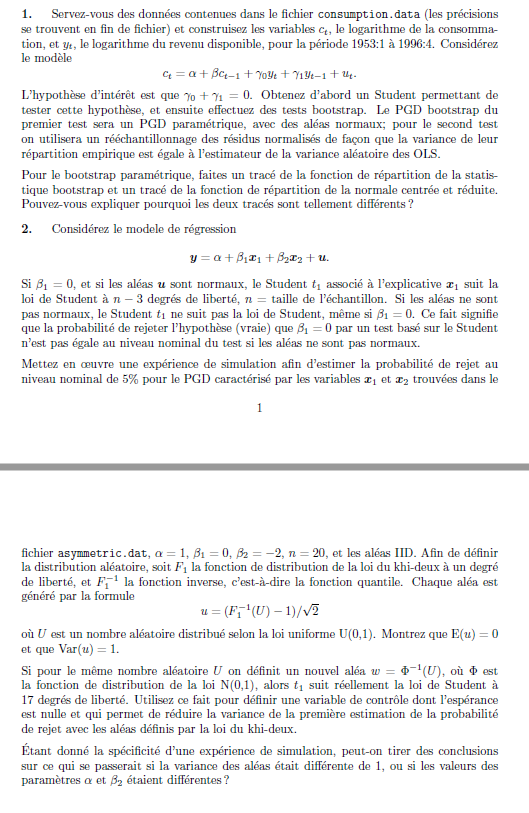

                                                Source: Russell Davidson

## Libraries importation

In [1]:
library(boot)
library(DataCombine)
library(MASS)
library(resample)

Warning message:
"package 'DataCombine' was built under R version 3.4.4"

# 1. 

#### Data

Source :

Russell Davidson and James G. MacKinnon, Econometric Theory and Methods, New York, Oxford University Press, 2004.

In [2]:
consumption_df = read.csv(url("https://russell-davidson.arts.mcgill.ca/data/consumption.csv"), header = FALSE)
head(consumption_df)

V1,V2,V3,V4,V5
1,1947,1,59505.0,57168
2,1947,2,59717.4,55464
3,1947,3,59039.1,56332
4,1947,4,61342.6,55836
5,1948,1,60544.6,54488
6,1948,2,60324.6,53676


In [3]:
tail(consumption_df)

,V1,V2,V3,V4,V5
195,195,1995,3,388239.8,359348
196,196,1995,4,390576.6,359372
197,197,1996,1,391381.5,363896
198,198,1996,2,389502.6,364428
199,199,1996,3,388282.1,366224
200,200,1996,4,388804.1,371236


In [4]:
#dimenssion of df
dim(consumption_df)

[1] 200   5

#### Data description

Column 1 is the observation number.

Column 2 is the year.

Column 3 is the quarter. 

Column 4 is YD, Personal disposable income, 1986 dollars, Canada, SA 

Column 5 is CE, Personal consumption expenditure, 1986 dollars, Canada, SA.

In [5]:
colnames(consumption_df) = c("obs", "year", "quarter", "income", "consum")
head(consumption_df)

obs,year,quarter,income,consum
1,1947,1,59505.0,57168
2,1947,2,59717.4,55464
3,1947,3,59039.1,56332
4,1947,4,61342.6,55836
5,1948,1,60544.6,54488
6,1948,2,60324.6,53676


#### Variable construction

$\left\{
    \begin{array}{ll}
        c_t :\mbox{  logarithm of consumption,}  \\
        y_t :\mbox{  logarithm of disposable income} 
     \end{array}
\right.$

NB : For period 1953:1 to 1996:4

Selection of data for the period 1953:1 to 1996:4

In [6]:
df = consumption_df[consumption_df$year >= 1953,]
head(df)

,obs,year,quarter,income,consum
25,25,1953,1,77918.8,70680
26,26,1953,2,78343.0,71328
27,27,1953,3,78300.9,71216
28,28,1953,4,78995.4,72456
29,29,1954,1,77061.9,72052
30,30,1954,2,77282.0,73592


Creating $c_t$ and $y_t$ :

In [7]:
df["ct"] = log(df$consum)
df["yt"] = log(df$income)
head(df)

,obs,year,quarter,income,consum,ct,yt
25,25,1953,1,77918.8,70680,11.16592,11.26342
26,26,1953,2,78343.0,71328,11.17504,11.26885
27,27,1953,3,78300.9,71216,11.17347,11.26831
28,28,1953,4,78995.4,72456,11.19073,11.27714
29,29,1954,1,77061.9,72052,11.18514,11.25236
30,30,1954,2,77282.0,73592,11.20629,11.25522


Let's now consider the following model : 

$c_t = \alpha + \beta c_{t-1} + \gamma_0 y_{t} + \gamma_1 y_{t-1} + u_t$

We want to test the null hypothesis : $ \gamma_0 + \gamma_1 = 0$.

#### Let's first estimate the model with simple OLS:

Generating the lag-1 variables

In [8]:
df["ct_1"] = slide(df, Var = 'ct', NewVar = "ct_1", slideBy = -1)$ct_1
df["yt_1"] = slide(df, Var = 'yt', NewVar = "yt_1", slideBy = -1)$yt_1
head(df)


Remember to put df in time order before running.

Lagging ct by 1 time units.


Remember to put df in time order before running.

Lagging yt by 1 time units.



,obs,year,quarter,income,consum,ct,yt,ct_1,yt_1
25,25,1953,1,77918.8,70680,11.16592,11.26342,NA,NA
26,26,1953,2,78343.0,71328,11.17504,11.26885,11.16592,11.26342
27,27,1953,3,78300.9,71216,11.17347,11.26831,11.17504,11.26885
28,28,1953,4,78995.4,72456,11.19073,11.27714,11.17347,11.26831
29,29,1954,1,77061.9,72052,11.18514,11.25236,11.19073,11.27714
30,30,1954,2,77282.0,73592,11.20629,11.25522,11.18514,11.25236


In [9]:
#getting rid of the first line 
df = df[2:176,]
head(df)

,obs,year,quarter,income,consum,ct,yt,ct_1,yt_1
26,26,1953,2,78343.0,71328,11.17504,11.26885,11.16592,11.26342
27,27,1953,3,78300.9,71216,11.17347,11.26831,11.17504,11.26885
28,28,1953,4,78995.4,72456,11.19073,11.27714,11.17347,11.26831
29,29,1954,1,77061.9,72052,11.18514,11.25236,11.19073,11.27714
30,30,1954,2,77282.0,73592,11.20629,11.25522,11.18514,11.25236
31,31,1954,3,78457.6,73876,11.21014,11.27031,11.20629,11.25522


#### OLS regression

In [10]:
results = lm(ct~  ct_1 + yt + yt_1 , df)
summary(results)


Call:
lm(formula = ct ~ ct_1 + yt + yt_1, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033910 -0.006417  0.001250  0.006129  0.025154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.06478    0.02210   2.931  0.00383 ** 
ct_1         0.96866    0.02254  42.977  < 2e-16 ***
yt           0.29090    0.05527   5.263 4.20e-07 ***
yt_1        -0.26457    0.05667  -4.668 6.11e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009627 on 171 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 1.591e+05 on 3 and 171 DF,  p-value: < 2.2e-16


#### T-test

$\left\{
    \begin{array}{ll}
        H_0 :\gamma_0 + \gamma_1 = 0  \\
        H_1 :\gamma_0 + \gamma_1 \neq 0 
     \end{array}
\right.$

$ t* = \frac{\hat{\gamma}_0 + \hat{\gamma}_1}{\hat{\sigma}_{\hat{\gamma}_0 + \hat{\gamma}_1}} \sim N(0,1)$

Covariance-variance matrix of parameters : $V(\hat{\beta})$

In [11]:
cova = vcov(results)
cova

,(Intercept),ct_1,yt,yt_1
(Intercept),0.0004883087,-0.0003151245,-0.0001455246,0.0004181575
ct_1,-0.0003151245,0.0005079955,-0.0001385599,-0.0003391976
yt,-0.0001455246,-0.0001385599,0.0030545687,-0.0029075896
yt_1,0.0004181575,-0.0003391976,-0.0029075896,0.0032118588


$\hat{\sigma}_{\hat{\gamma}_0 + \hat{\gamma}_1}^2 = \hat{\sigma}_{\hat{\gamma}_0}^2 + \hat{\sigma}_{\hat{\gamma}_1}^2 + 2 \hat{cov}(\hat{\gamma}_0, \hat{\gamma}_1)$

$\hat{\sigma}_{\hat{\gamma}_0 + \hat{\gamma}_1} = \sqrt{ \hat{\sigma}_{\hat{\gamma}_0}^2 + \hat{\sigma}_{\hat{\gamma}_1}^2 + 2 \hat{cov}(\hat{\gamma}_0, \hat{\gamma}_1)}$

In [12]:
gammat0_hat = results$coefficients["yt"]
gammat1_hat = results$coefficients["yt_1"]
sigma_hat = sqrt(cova["yt","yt"] + cova["yt_1","yt_1"] + 2 * cova["yt","yt_1"])

t = (gammat0_hat + gammat1_hat)/sigma_hat
cat("t = ", t)

t =  1.239553

$t_0 = 1.24 < 1.96$

So we can't reject $H_0$ when using a critical value of 5%. Then  :
$\gamma_0 + \gamma_1 = 0$

## Bootstrap tests

#### Parametric bootstrap

Procedure : 

- We will assume $u_t \sim N(\mu,\sigma^2)$
- Resampling the data : we will take as number of samples 999, each one of same size as the initial sample (175)
- Reestimating the parameters for each sample using Maximum Likelihood
- Re-doing the test for each estmation

$ \hat{P}_{value} = \frac{1}{N} \sum_{i = 1}^{N} 1|( |t_i| > t_0)$ 

with N the number of samples, $t_i$ the t-statistic of the $i^{th}$ sample, and $t_0$ the t-statitic of the initial sample

In [13]:
T_parametric = c()
R = c()
Beta_param = c()

for (s in 1:999) {

    random = sample(1:175, size=175, replace = TRUE)
    random_df = df[random,]
    

    reg = glm(ct ~ ct_1 + yt + yt_1, family=gaussian(), data=random_df)
    
    gammat0_hat = reg$coefficients["yt"]
    gammat1_hat = reg$coefficients["yt_1"]
    cova = vcov(reg)
    sigma_hat = sqrt(cova["yt","yt"] + cova["yt_1","yt_1"] + 2 * cova["yt","yt_1"])

    t = (gammat0_hat + gammat1_hat)/sigma_hat
    T_parametric = c(T_parametric,t)
    
    R = c(R, as.integer(abs(t)<1.96))
    
    }

p_value = mean(R)

In [14]:
p_value

[1] 0.7207207

P-value = 0.7 > 0.05 :  so we don't reject the $H_0$ hypothesis at the critical value of 5%

#### Non parametric bootstrap (using resampling)

 - Fitting the model by OLS and computing an initial t-statistic
 - Retaining the residuals and rescaling using studentizing method them : 
     
     - Studentizing method : 
     
     $ P_{X} = X(X^{T}X)^{-1}X^{T} $, the orthogonal projection matrix on X.
     and $\operatorname{var}(\widehat{\varepsilon}_i)=\sigma^2(1-h_{ii})$ the variance of $\widehat{\varepsilon}_i$ with $h_{ii}$ the $i^{th}$ diagonal entry in $ P_{X}$ 
     
      The studentized residuals are then : $t_{i}={\widehat {\varepsilon }_{i} \over \widehat {\sigma }{\sqrt  {1-h_{{ii}}\ }}}$
 - Adding the randomly resampled studentized residuals, $t_{i}$, to the response variable $c_t$ :$ c_{t}^{*}=c_{t}+t_{i}$
 
 - Refiting the model using the fictitious response variables ${\displaystyle c_{t}^{*}}$ and recomputing the t-statistic 
 - Repeating the last 3 steps and doing the test for each fitting 

In [15]:
#Computing t-stat from the initial data
reg = lm(ct ~  ct_1 + yt + yt_1 , df)

#test
    
gammat0_hat = reg$coefficients["yt"]
gammat1_hat = reg$coefficients["yt_1"]
cova = vcov(reg)
sigma_hat = sqrt(cova["yt","yt"] + cova["yt_1","yt_1"] + 2 * cova["yt","yt_1"])

t0 = (gammat0_hat + gammat1_hat)/sigma_hat
cat("t0 = ", t0)

t0 =  1.239553

The t statitic got using the initial sample is $t_0 = 1.24$

In [16]:
#generating the t-statistic from diferent samples

T = c()
R = c()

for (s in 1:999) {
    
    
    #getting the ct_star
    st_residuals = studres(reg)  # studentized residuals
    random_st_residuals = sample(st_residuals, size=175, replace = TRUE)
    ct_star = df$ct + random_st_residuals

    reg = lm(ct_star ~  ct_1 + yt + yt_1 , df)

    #test
    
    gammat0_hat = reg$coefficients["yt"]
    gammat1_hat = reg$coefficients["yt_1"]
    cova = vcov(reg)
    sigma_hat = sqrt(cova["yt","yt"] + cova["yt_1","yt_1"] + 2 * cova["yt","yt_1"])

    t = (gammat0_hat + gammat1_hat)/sigma_hat
    T = c(T,t)
    


    }


p_value = mean(as.integer(T>t0))

In [17]:
p_value

[1] 0.1001001

$P_{value} = 0.1 > 0.05$ :  so we don't reject the $H_0$ hypothesis at the critical value of 5%

#### Graph of the empirical distribution function (EDF) of the bootstrap statistics (got from the parametric bootstrap) and the cumulative distribution function (CDF) of  the standard normal distribution.

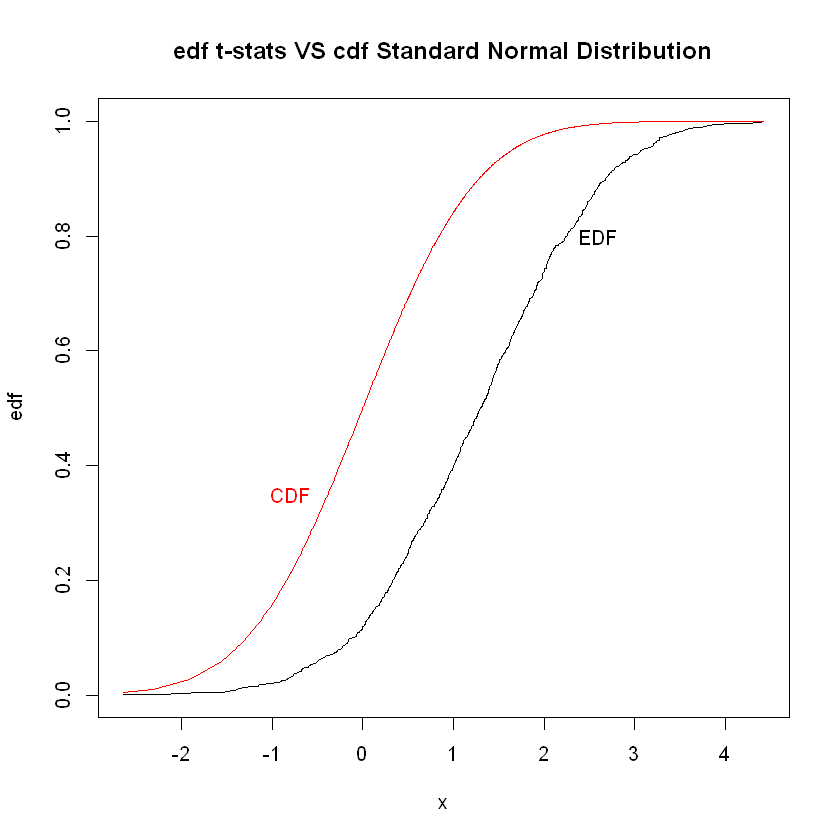

In [18]:
edf = (1:999)/999
x = sort(T_parametric)
plot(x,edf, "l", main = "edf t-stats VS cdf Standard Normal Distribution")
lines(x, pnorm(x), col = "red")
text(-0.8, 0.35, "CDF", col = "red")
text(2.6, 0.8, "EDF")

We can see a big difference between the EDF and and the CDF : The EDF got by the parametric bootstrap is shifted at the right compared to the CDF of the standard normal distribution. So very likely, the EDF seems to be different from the CDF. Then assuming that $u_t$ follows the standard normal distribution is likely misleading. Then in this case, the test based on the non-parametric bootstrap is more reliable than the one based on the parametric bootstrap.

# 2.

$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + u$

## Monte Carlo experiment to estimate the rejection probability at the 5% level

Using $\alpha = 1$, $\beta_1 = 0$, $\beta_2 = -2$ and $n = 20$.

In [19]:
asymmetric_df = read.csv("asymmetric.dat"), header = FALSE, sep = "")
colnames(asymmetric_df) = c("x1","x2") 
head(asymmetric_df)

x1,x2
1.826408,4.623533
3.771811,1.574504
1.210247,3.719750
1.231272,3.615939
2.379106,2.565849
1.628604,2.593191


In [20]:
dim(asymmetric_df)

[1] 20  2

#### Generating the residuals

$u = (F_1^{-1}(U) - 1)/\sqrt{2}$ with $F_1^{-1}$ the chi-squared distribution with one degree of freedom and U a random number from the uniform distribution U(0,1).

In [21]:
u_vector = c()

for (m in 1:999) {
    
    U = runif(20)
    u = (qchisq(U, df=1) - 1)/sqrt(2)
    u_vector = c(u_vector, u)
    }

In [22]:
mean(u_vector)

[1] 0.008865008

In [23]:
var(u_vector)

[1] 1.034131

As we can notice $E(u) = 0$ and $Var(u) = 1$

y is genered in this way: 

$y = 1 + 0 * x_1 - 2 * x_2 + u = 1 - 2 * x_2 + u $

#### Statistical test: 

$H_0 : \beta_1 = 0 \\ 
t = \frac{\hat{\beta}_1}{\hat{\sigma}_{\hat{\beta}_1}}$

In [24]:
U = runif(20)
u = (qchisq(U, df=1) - 1)/sqrt(2)
asymmetric_df["y"] = 1 - 2 * asymmetric_df$x2 + u
head(asymmetric_df)

x1,x2,y
1.826408,4.623533,-7.6091088
3.771811,1.574504,0.8775827
1.210247,3.719750,-6.4847723
1.231272,3.615939,-6.5145148
2.379106,2.565849,-4.7826084
1.628604,2.593191,-2.4791210


In [25]:
regression = lm(y ~ x1 + x2, data = asymmetric_df)
summary(regression)


Call:
lm(formula = y ~ x1 + x2, data = asymmetric_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5172 -0.9813 -0.3156  0.2305  3.6620 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.8579     1.9126  -0.449 0.659410    
x1            0.4907     0.3677   1.335 0.199620    
x2           -1.7043     0.3902  -4.368 0.000419 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.421 on 17 degrees of freedom
Multiple R-squared:  0.7331,	Adjusted R-squared:  0.7018 
F-statistic: 23.35 on 2 and 17 DF,  p-value: 1.328e-05


In [26]:
# initial statistics test
cova = vcov(regression)
t0 = regression$coefficients["x1"]/sqrt(cova["x1","x1"])

In [27]:
T = c()
for (m in 1:999) {
    
    U = runif(20)
    u = (qchisq(U, df=1) - 1)/sqrt(2)
    asymmetric_df["y"] = 1 - 2 * asymmetric_df$x2 + u
    
    reg = lm(y ~ x1 + x2, data = asymmetric_df)
    cova = vcov(reg)
    
    #test stats
    t = reg$coefficients["x1"]/sqrt(cova["x1","x1"])
    
    T = c(T, t)
    
    }

p_value = mean(as.integer(T>t0))
variance = p_value * (1 - p_value)/999
cat(" p_value = ",p_value, "\n", "variance = ", variance)

 p_value =  0.0950951 
 variance =  8.613816e-05

As the p-value is greater than 5%, we do not reject the null hypotheses at the critical value of 5%. So $\beta_1 = 0$

#### Variance reduction

$ w = \Phi^{-1}(U)$ with $\Phi$ the CDF of standard normal

Let's define a new covariate z such that: 

$z=\dfrac{u - w}{2}$

$E(z) = \dfrac{E(u) - E(w)}{2} = 0$

$Var(z) = \frac{1}{4} [Var(u) + Var(w) - 2 Cov(u,w)]\\
Var(z) = \frac{1}{2} [1 - cov((F_1^{-1}(U) - 1)/\sqrt{2}, \mbox{ }\Phi^{-1}(U))]\\
Var(z) = \frac{1}{2} [1 - \frac{1}{\sqrt{2}} cov(F_1^{-1}(U), \mbox{ }\Phi^{-1}(U))] < Var (u) = 1 \mbox{  cause } cov(F_1^{-1}(U), \mbox{ }\Phi^{-1}(U)) > 0$

Variance of the rejection probability : 

$ Var(\hat{P}_{value}) = \dfrac{1}{N} Pr( t_i > t_0) [1 - Pr( t_i > t_0)]$ 

with N the number of samples

Estimation of $Var(\hat{P}_{value})$ : 

In [28]:
# initial statistics test using z instead of u
U = runif(20)
u = (qchisq(U, df=1) - 1)/sqrt(2)
w = qnorm(U)
z = (u - w)/2
asymmetric_df["y"] = 1 - 2 * asymmetric_df$x2 + u
asymmetric_df["y_z"] = 1 - 2 * asymmetric_df$x2 + z

regression = lm(y_z ~ x1 + x2, data = asymmetric_df)
regression_z = lm(y_z ~ x1 + x2, data = asymmetric_df)

cova = vcov(regression)

t0 = regression$coefficients["x1"]/sqrt(cova["x1","x1"])

cova = vcov(regression_z)
t0_z = regression$coefficients["x1"]/sqrt(cova["x1","x1"])

In [29]:
#estimating the p_value 99 times with samples of 99 observations
T = c(); T_z = c()
P_value = c()
P_value_z = c()
for (s in 1:99) { 
    for (m in 1:99) {

        U = runif(20)
        u = (qchisq(U, df=1) - 1)/sqrt(2)
        w = qnorm(U)
        z= (u - w)/2

        #with u 
        asymmetric_df["y"] = 1 - 2 * asymmetric_df$x2 + u

        reg = lm(y ~ x1 + x2, data = asymmetric_df)
        cova = vcov(reg)

        #test stats

        t = reg$coefficients["x1"]/sqrt(cova["x1","x1"])

        T = c(T, t)


        #with z

        asymmetric_df["y_z"] = 1 - 2 * asymmetric_df$x2 + z

        reg = lm(y_z ~ x1 + x2, data = asymmetric_df)
        cova = vcov(reg)

        t_z = reg$coefficients["x1"]/sqrt(cova["x1","x1"])

        T_z = c(T_z, t_z)

        }

    p_value = mean(as.integer(T>t0))

    p_value_z = mean(as.integer(T_z>t0_z))


    P_value = c(P_value, p_value)
    P_value_z = c(P_value_z, p_value_z)

    }

In [30]:
var(P_value)

[1] 0.0001900936

In [31]:
var(P_value_z)

[1] 6.674192e-05

$Var(P_{value}(u)) = 1.9 *10^{-4} > Var(P_{value}(z)) = 6.67*10^{-5}$

As we can see, the variance of the P-value got using $z$ is clearly less than the one got using $u$ 

#### Comments

If the variance of the disturbances is different from 1, or if the values of the parameters $\alpha$ and $\beta_2$ were different, the results of the simulation experiment (such as the estmated $P_{value}$) would very likely change, but the result of the hypothesis testing $H_0 : \beta_1 = 0$ should remain stable if we generate the data using this condition.